# Introduction to neural networks with TF

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another

A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)


In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now ... let's visualize it 

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


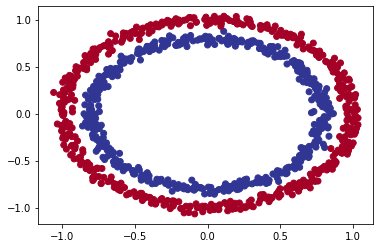

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working 
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and lables
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate
7. Tweak
8. Evaluate ...

In [9]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5, verbose=1)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820


In [10]:
# Let's try and improve our model by training for longer ...
model_1.fit(X, y, epochs=200, verbose=0)

In [11]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy ... it's performing as it is guessing. 

So let's step things up a nothch and add extra layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=200, verbose=0)

In [13]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935999989509583, 0.5]

In [15]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improve our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3. Fitting the model
model_3.fit(X, y, epochs=100, verbose=0)

In [17]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls).

In [18]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """Plots the decision boundary created by a model predicting on X.
    This function was inspired by:
    1. cs231 course on CNN. There you can find a
    similar function, spiral. https://cs231n.github.io/convolutional-networks/#convert
    
    2. Second resource is madeforML, multilayer perceptor.
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    #Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


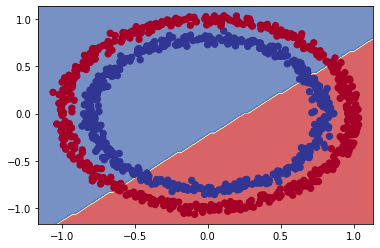

In [19]:
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

Let's see if our model can be used for a regression problem ...

In [20]:
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [28]:
# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit oour model to the regression data

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=2)

Epoch 1/100


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

We complied our model for a binary classification problem. 

But...we're now working on a regression problem, let's change the model to suit our data.

In [25]:
y_reg_train

<tf.Tensor: shape=(150,), dtype=int32, numpy=
array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
       230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290,
       295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355,
       360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420,
       425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485,
       490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550,
       555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615,
       620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680,
       685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745,
       750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810,
       815, 820, 825, 830, 835, 840, 845])>

In [29]:
# Set up random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 3ms/step - loss: 38.8398 - mae: 38.8398
Epoch 88/100
5/5 [==============================] - 0s 5ms/step - loss: 38.6604 - mae: 38.6604
Epoch 89/100
5/5 [==============================] - 0s 5ms/step - loss: 38.7559 - mae: 38.7559
Epoch 90/100
5/5 [==============================] - 0s 4ms/step - loss: 38.5442 - mae: 38.5442
Epoch 91/100
5/5 [==============================] - 0s 3ms/step - loss: 38.3247 - mae: 38.3247
Epoch 92/100
5/5 [==============================] - 0s 3ms/step - loss: 38.8431 - mae: 38.8431
Epoch 93/100
5/5 [==============================] - 0s 5ms/step - loss: 39.1137 - mae: 39.1137
Epoch 94/100
5/5 [==============================] - 0s 5ms/step - loss: 38.1463 - mae: 38.1463
Epoch 95/100
5/5 [==============================] - 0s 5ms/step - loss: 38.3998 - mae: 38.3998
Epoch 96/100
5/5 [==============================] - 0s 5ms/step - loss: 38.5599 - mae: 38.5599
Epoch 97/100
5/5 [==============================] - 0s 5ms/step

2/2 [==============================] - 0s 5ms/step


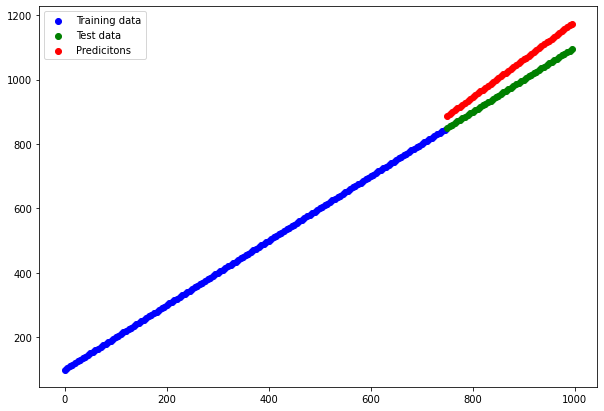

In [31]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predicitons")
plt.legend();

## The missing piece: Non-linearity

In [35]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics="accuracy")

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

c:\users\ovidi\projects\ibmqx\qiskit\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
32/32 [==============================] - 5s 6ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7419 - accuracy: 0.4220
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.7204 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7193 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7182 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7173 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7163 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7154 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7136 - accuracy: 0.4880
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7128 - accuracy: 0.4910
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7120 - accuracy: 0.4900
Epoch 93/100


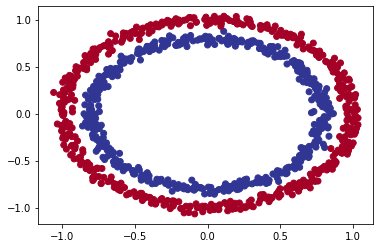

In [36]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


313/313 [==============================] - 1s 2ms/step
doing binary classification


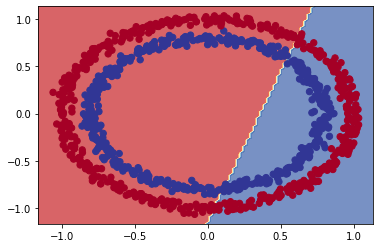

In [37]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                      X=X,
                      y=y)

Let's try build our first neural network with a non-linear activation function

In [39]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model with non-linear
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics="accuracy")

# 3. Fit the model
model_6.fit(X, y, epochs=100, verbose=1)

Epoch 1/100


c:\users\ovidi\projects\ibmqx\qiskit\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7419 - accuracy: 0.4220
Epoch 11/100
32/32 [=

32/32 [==============================] - 0s 2ms/step - loss: 0.7204 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7193 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7173 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7163 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7136 - accuracy: 0.4880
Epoch 91/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7128 - accuracy: 0.4910
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7120 - accuracy: 0.4900
Epoch 93/100


313/313 [==============================] - 1s 2ms/step
doing binary classification


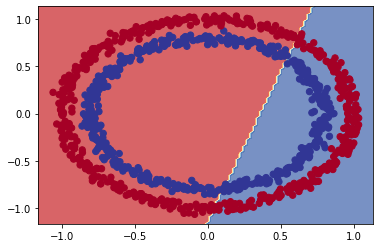

In [40]:
# Check the decision boundary for our model
plot_decision_boundary(model=model_6,
                      X=X,
                      y=y)

In [46]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# 1. Create de model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu")
])

#2. Complie the model
model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])

# 3. Fit the  model
history = model_7.fit(X, y, epochs= 1000)

Epoch 1/1000


c:\users\ovidi\projects\ibmqx\qiskit\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 2.3938 - accuracy: 0.1910
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.7922 - accuracy: 0.1850
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 1.4365 - accuracy: 0.1910
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 1.2626 - accuracy: 0.1990
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 1.1758 - accuracy: 0.2030
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 1.0821 - accuracy: 0.2080
Epoch 7/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.8747 - accuracy: 0.2660
Epoch 8/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.8439 - accuracy: 0.2860
Epoch 9/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.8313 - accuracy: 0.2870
Epoch 10/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.8206 - accuracy: 0.2890
Epoch 11/100

32/32 [==============================] - 0s 5ms/step - loss: 0.6659 - accuracy: 0.3150
Epoch 83/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.6651 - accuracy: 0.3100
Epoch 84/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.6639 - accuracy: 0.2950
Epoch 85/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.2950
Epoch 86/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.6629 - accuracy: 0.2960
Epoch 87/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.6617 - accuracy: 0.3010
Epoch 88/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.6610 - accuracy: 0.3050
Epoch 89/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.6605 - accuracy: 0.2970
Epoch 90/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.6599 - accuracy: 0.3000
Epoch 91/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.6584 - accuracy: 0.2850
Epoc

32/32 [==============================] - 0s 4ms/step - loss: 0.5104 - accuracy: 0.2060
Epoch 163/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.5073 - accuracy: 0.1980
Epoch 164/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.5040 - accuracy: 0.2030
Epoch 165/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.1830
Epoch 166/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.1830
Epoch 167/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4950 - accuracy: 0.1670
Epoch 168/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4913 - accuracy: 0.1850
Epoch 169/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4876 - accuracy: 0.1830
Epoch 170/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.1720
Epoch 171/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.4806 - accuracy: 0.

32/32 [==============================] - 0s 4ms/step - loss: 0.2517 - accuracy: 0.1540
Epoch 243/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.2490 - accuracy: 0.1730
Epoch 244/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.2471 - accuracy: 0.2070
Epoch 245/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.2447 - accuracy: 0.1810
Epoch 246/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.2424 - accuracy: 0.1590
Epoch 247/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.2405 - accuracy: 0.1940
Epoch 248/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.2369 - accuracy: 0.2080
Epoch 249/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.2040
Epoch 250/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.2327 - accuracy: 0.2270
Epoch 251/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.2314 - accuracy: 0.

32/32 [==============================] - 0s 4ms/step - loss: 0.1371 - accuracy: 0.4300
Epoch 323/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.1350 - accuracy: 0.4180
Epoch 324/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1346 - accuracy: 0.4480
Epoch 325/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.4330
Epoch 326/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.4380
Epoch 327/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.1314 - accuracy: 0.4300
Epoch 328/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.1309 - accuracy: 0.4350
Epoch 329/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.1298 - accuracy: 0.4410
Epoch 330/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.1296 - accuracy: 0.4340
Epoch 331/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.1280 - accuracy: 0.

32/32 [==============================] - 0s 4ms/step - loss: 0.0772 - accuracy: 0.4710
Epoch 403/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0769 - accuracy: 0.4760
Epoch 404/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 0.4590
Epoch 405/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0754 - accuracy: 0.4530
Epoch 406/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0756 - accuracy: 0.4700
Epoch 407/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0746 - accuracy: 0.4630
Epoch 408/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0746 - accuracy: 0.4700
Epoch 409/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0736 - accuracy: 0.4820
Epoch 410/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0730 - accuracy: 0.4860
Epoch 411/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.

32/32 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.4090
Epoch 483/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.3920
Epoch 484/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.4060
Epoch 485/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0470 - accuracy: 0.4080
Epoch 486/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0468 - accuracy: 0.3950
Epoch 487/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0463 - accuracy: 0.4030
Epoch 488/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0460 - accuracy: 0.3970
Epoch 489/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0458 - accuracy: 0.4020
Epoch 490/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0455 - accuracy: 0.4050
Epoch 491/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0454 - accuracy: 0.

32/32 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.4260
Epoch 563/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.4210
Epoch 564/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.4360
Epoch 565/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.4220
Epoch 566/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.4690
Epoch 567/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.4410
Epoch 568/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0328 - accuracy: 0.4520
Epoch 569/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0329 - accuracy: 0.4460
Epoch 570/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.4410
Epoch 571/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0328 - accuracy: 0.

32/32 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.4880
Epoch 643/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.5060
Epoch 644/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.4670
Epoch 645/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0251 - accuracy: 0.4860
Epoch 646/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0255 - accuracy: 0.4660
Epoch 647/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.4720
Epoch 648/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0250 - accuracy: 0.5110
Epoch 649/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.4880
Epoch 650/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0253 - accuracy: 0.4860
Epoch 651/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.

32/32 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.6110
Epoch 723/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.5120
Epoch 724/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.4720
Epoch 725/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0208 - accuracy: 0.5150
Epoch 726/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0208 - accuracy: 0.4980
Epoch 727/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0204 - accuracy: 0.4890
Epoch 728/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0205 - accuracy: 0.5140
Epoch 729/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0204 - accuracy: 0.5070
Epoch 730/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0205 - accuracy: 0.4750
Epoch 731/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0203 - accuracy: 0.

32/32 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.4710
Epoch 803/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.5200
Epoch 804/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.4900
Epoch 805/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.4760
Epoch 806/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 0.5260
Epoch 807/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.5830
Epoch 808/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0173 - accuracy: 0.5010
Epoch 809/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.4810
Epoch 810/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0175 - accuracy: 0.4690
Epoch 811/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.

32/32 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.5490
Epoch 883/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 0.5150
Epoch 884/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 0.4750
Epoch 885/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0154 - accuracy: 0.5360
Epoch 886/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 0.5270
Epoch 887/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.5530
Epoch 888/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.4900
Epoch 889/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.5420
Epoch 890/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0156 - accuracy: 0.5160
Epoch 891/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0155 - accuracy: 0.

32/32 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.4790
Epoch 963/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.4950
Epoch 964/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.4660
Epoch 965/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0135 - accuracy: 0.5270
Epoch 966/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0133 - accuracy: 0.4930
Epoch 967/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0134 - accuracy: 0.4950
Epoch 968/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.5500
Epoch 969/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0135 - accuracy: 0.4690
Epoch 970/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0133 - accuracy: 0.4840
Epoch 971/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0133 - accuracy: 0.

In [47]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.4680


[0.012379320338368416, 0.46799999475479126]

313/313 [==============================] - 1s 2ms/step
doing multiclass classification


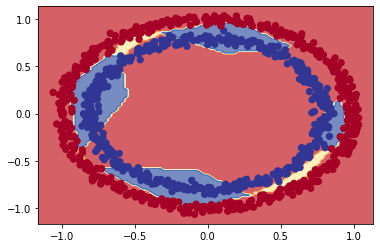

In [48]:
# How do our model predictions look?
plot_decision_boundary(model_7, X, y)

In [54]:
# Improve the multi-layer neural network from playground

# Set the random seed
tf.random.set_seed(42)

# 1. create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])

# 3. Fit the model
history= model_8.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

32/32 [==============================] - 0s 6ms/step - loss: 0.4360 - accuracy: 0.9630
Epoch 84/250
32/32 [==============================] - 0s 5ms/step - loss: 0.4260 - accuracy: 0.9690
Epoch 85/250
32/32 [==============================] - 0s 6ms/step - loss: 0.4145 - accuracy: 0.9700
Epoch 86/250
32/32 [==============================] - 0s 3ms/step - loss: 0.4059 - accuracy: 0.9740
Epoch 87/250
32/32 [==============================] - 0s 4ms/step - loss: 0.3962 - accuracy: 0.9750
Epoch 88/250
32/32 [==============================] - 0s 6ms/step - loss: 0.3873 - accuracy: 0.9720
Epoch 89/250
32/32 [==============================] - 0s 6ms/step - loss: 0.3795 - accuracy: 0.9750
Epoch 90/250
32/32 [==============================] - 0s 6ms/step - loss: 0.3716 - accuracy: 0.9750
Epoch 91/250
32/32 [==============================] - 0s 6ms/step - loss: 0.3635 - accuracy: 0.9840
Epoch 92/250
32/32 [==============================] - 0s 6ms/step - loss: 0.3554 - accuracy: 0.9830
Epoch 93/250


32/32 [==============================] - 0s 5ms/step - loss: 0.1031 - accuracy: 0.9930
Epoch 165/250
32/32 [==============================] - 0s 6ms/step - loss: 0.1027 - accuracy: 0.9890
Epoch 166/250
32/32 [==============================] - 0s 6ms/step - loss: 0.1010 - accuracy: 0.9930
Epoch 167/250
32/32 [==============================] - 0s 6ms/step - loss: 0.0996 - accuracy: 0.9930
Epoch 168/250
32/32 [==============================] - 0s 6ms/step - loss: 0.0986 - accuracy: 0.9920
Epoch 169/250
32/32 [==============================] - 0s 6ms/step - loss: 0.0970 - accuracy: 0.9930
Epoch 170/250
32/32 [==============================] - 0s 5ms/step - loss: 0.0959 - accuracy: 0.9920
Epoch 171/250
32/32 [==============================] - 0s 5ms/step - loss: 0.0949 - accuracy: 0.9920
Epoch 172/250
32/32 [==============================] - 0s 6ms/step - loss: 0.0937 - accuracy: 0.9920
Epoch 173/250
32/32 [==============================] - 0s 6ms/step - loss: 0.0926 - accuracy: 0.9930
Epoc

32/32 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9940
Epoch 246/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9930
Epoch 247/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9950
Epoch 248/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9930
Epoch 249/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9950
Epoch 250/250
32/32 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9940


In [55]:
# Evaluate the model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9920


[0.045933641493320465, 0.9919999837875366]

313/313 [==============================] - 1s 2ms/step
doing binary classification


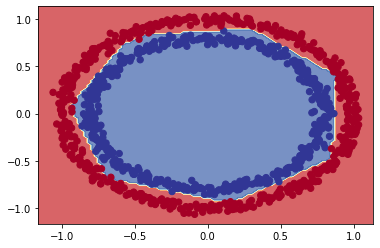

In [56]:
# Plot the prediction model
plot_decision_boundary(model_8, X, y)

**Note:** The combination of **linear (straight lines)** and **non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we're discussed the concept of linear and non-linear functons (or lines), let's see them in action.

In [58]:
# Create a toy tensor (similar to the data we pass into our model)

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

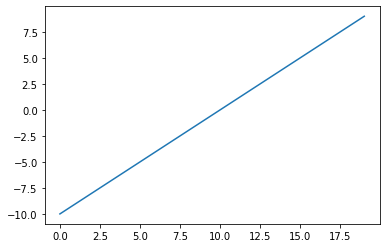

In [59]:
# Visualize our toy tensor
plt.plot(A);

In [60]:
# Let's start by replicationg sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def mySigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor

mySigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

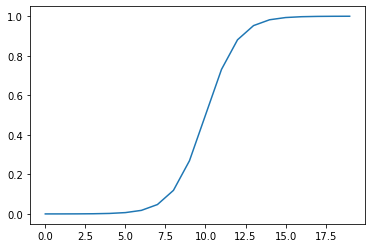

In [61]:
# Plot our toy tensor transformed by sigmoid

plt.plot(mySigmoid(A));

In [62]:
# Let's recreate the relu function

def myRelu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom function
myRelu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

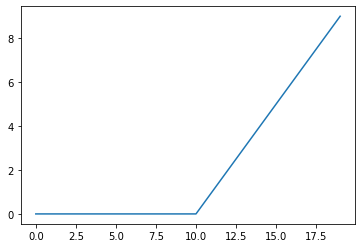

In [63]:
# Plot our tensor transformed by the custom function
plt.plot(myRelu(A));

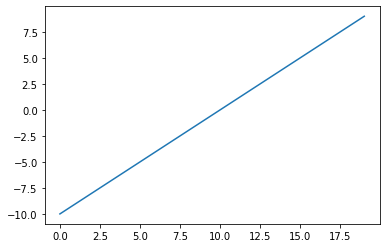

In [64]:
plt.plot(A);

In [65]:
# Let's try the hyperbolic tangential function 
# tanh(x) = sinh(x)/cosh(x) = ((exp(x) - exp(-x))/(exp(x) + exp(-x)))

# Create the custom function, hyperbolic tangential: 

def myTanh(x):
    return (tf.exp(x) - (tf.exp(-x)))/(tf.exp(x) + (tf.exp(-x)))

# Pass our toy tensor to the custom function
myTanh(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-1.        , -1.        , -0.9999998 , -0.99999845, -0.9999877 ,
       -0.9999091 , -0.9993293 , -0.9950547 , -0.9640275 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640275 ,  0.9950547 ,  0.9993293 ,
        0.9999091 ,  0.9999877 ,  0.99999845,  0.9999998 ,  1.        ],
      dtype=float32)>

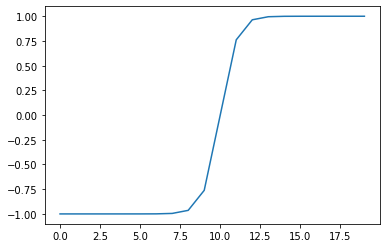

In [66]:
#Plot our transformed tensor with the custom function
plt.plot(myTanh(A));

In [71]:
# Let's try the linear activation function

B = tf.keras.activations.linear(A)
B

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

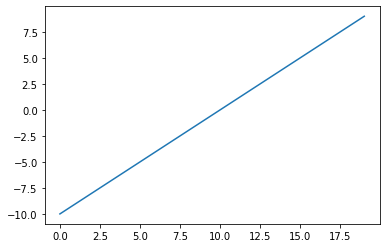

In [72]:
# Does the linear activation function change anything?

plt.plot(B);

In [74]:
# Does A even change?

A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>